In [1]:
#MAPI_BOX="https://api.themoviedb.org/3/movie/550?api_key=0e2bbdb9b1fd91d87793fa8cd3aa8474"

## Loading Imports and Reading Training Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
import sklearn
from sklearn.preprocessing import StandardScaler
from scipy.interpolate import *

In [3]:
from collections import Counter
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Loading & reading the data
from pathlib import Path

file_path = Path('./Resources/train.csv')
df = pd.read_csv(file_path, index_col="id")
df.head()

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
id,,,,,,,,,,,,,,,,,,,,,
1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


## Cleaning Data

In [5]:
# Checking for nulls
df.isnull()

# finding number of nulls
df.isnull().sum()

# Dropping Nulls from Data
train_df = df.drop(columns = ["belongs_to_collection", "homepage", "imdb_id", "original_title", "overview", "popularity", "poster_path", "production_companies", "production_countries", "status", "tagline", "Keywords", "crew"], axis=1)
train_df.head()

,budget,genres,original_language,release_date,runtime,spoken_languages,title,cast,revenue
id,,,,,,,,,
1,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...",12314651
2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...",95149435
3,3300000,"[{'id': 18, 'name': 'Drama'}]",en,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Whiplash,"[{'cast_id': 5, 'character': 'Andrew Neimann',...",13092000
4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...",16000000
5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Marine Boy,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...",3923970


## Rearranging Data Order

In [6]:
# Rearranging the columns 
train_df = train_df.loc[:, ["title", "runtime", "budget", "release_date", "cast", "genres", "original_language", "spoken_languages", "revenue"]]
train_df.head()

,title,runtime,budget,release_date,cast,genres,original_language,spoken_languages,revenue
id,,,,,,,,,
1,Hot Tub Time Machine 2,93.0,14000000,2/20/15,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'id': 35, 'name': 'Comedy'}]",en,"[{'iso_639_1': 'en', 'name': 'English'}]",12314651
2,The Princess Diaries 2: Royal Engagement,113.0,40000000,8/6/04,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,"[{'iso_639_1': 'en', 'name': 'English'}]",95149435
3,Whiplash,105.0,3300000,10/10/14,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'id': 18, 'name': 'Drama'}]",en,"[{'iso_639_1': 'en', 'name': 'English'}]",13092000
4,Kahaani,122.0,1200000,3/9/12,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",16000000
5,Marine Boy,118.0,0,2/5/09,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",3923970


In [7]:
train_df=train_df.dropna()

## Setting Features (X) and Label (y)

In [8]:
# Using the runtime of movies to predict the revenue
X = train_df['runtime'].to_frame()
X.head()

,runtime
id,
1,93.0
2,113.0
3,105.0
4,122.0
5,118.0


In [9]:
y = train_df['revenue'].to_frame()
y.head()

,revenue
id,
1,12314651
2,95149435
3,13092000
4,16000000
5,3923970


In [11]:
X.shape

(2962, 1)

## Fitting Models

In [12]:
# coverting into series

In [0]: X['runtime'].shape
Out[0]: (5,1)
# print(X)

In [13]:
X.dtypes

runtime    float64
dtype: object

In [14]:
print(X)

      runtime
id           
1        93.0
2       113.0
3       105.0
4       122.0
5       118.0
...       ...
2996    102.0
2997    102.0
2998    120.0
2999     90.0
3000    106.0

[2962 rows x 1 columns]


In [15]:
print(y)

        revenue
id             
1      12314651
2      95149435
3      13092000
4      16000000
5       3923970
...         ...
2996    1596687
2997     180590
2998   89456761
2999  171963386
3000   82087155

[2962 rows x 1 columns]


In [16]:
from pandas import Series
from numpy.random import randn
N = 2962

# Independent Variables
X = X * np.random.rand(N, 1)-5
y = X * X**2 + X +2 + np.random.randn(N,1)


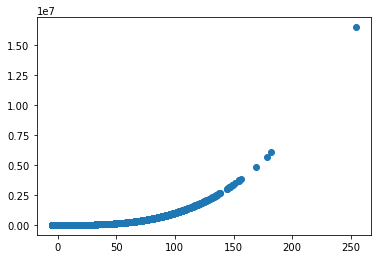

In [17]:
# plotting graph

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X,y)
plt.show()

In [18]:
# # Fitting Polynomial 
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4, include_bias=False)
X_poly = poly_reg.fit_transform(X)

In [19]:
# Instantiating
from sklearn.linear_model import LinearRegression

# fitting Lin_Reg for parameter learning and pedict
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.02479877]),
 array([[9.91975917e-01, 2.34220269e-04, 9.99998063e-01, 4.02170769e-09]]))

In [20]:
X_new =np.array([[2],[9], [5]])
X_poly_new = poly_reg.fit_transform(X_new)
y_predict = lin_reg.predict(X_poly_new)

In [21]:
# Predicted Values
y_predict

array([[ 12.00967205],
       [739.97016832],
       [131.99029427]])

Comparing the values to the Original Expression

In [22]:
y_original = 0.5 *0 +0+2 +2
y_original

4.0

In [23]:
y_original = 0.5*(2**2) + 9+2
y_original

13.0

In [24]:
y_original = 0.5 * (5**2)+5+2
y_original

19.5

Due to our findings, the predicted and actual values differ, incorrespondance to the noise and insufficient features (data) to minimize the error.
We wanted to take a complex and non-linear model and try to fit it to a linear model. 

## Runtime vs Revenue Graph

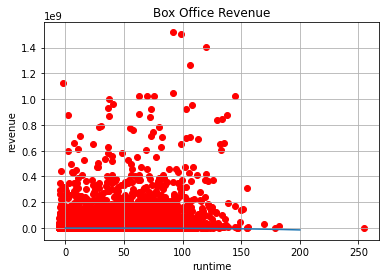

In [26]:
import matplotlib.pyplot as plt

# Visualizing 
x = train_df['runtime']
y = train_df['revenue']

x = np.linspace(0, 200, num=350)
fx = []
for i in range(len(x)):
               fx.append(x[i] **3 - 3*x[i]**3+35*x[i]**2+39*x[i]+70)

def viz_polymonial():
    plt.plot(x, fx)
    plt.grid()
    plt.scatter(X, y, color = 'red')
    plt.title('Box Office Revenue')
    plt.xlabel('runtime')
    plt.ylabel('revenue')
    plt.show()
              
    return
    
viz_polymonial()

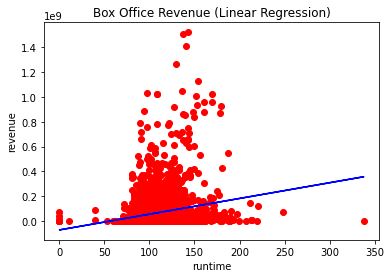

In [31]:
# Fitting to data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing
def viz_linear():
    plt.scatter(X, y, color = 'red')
    plt.plot(X, lin_reg.predict(X), color = 'blue')
    plt.title('Box Office Revenue (Linear Regression)')
    plt.xlabel('runtime')
    plt.ylabel('revenue')
    plt.show()
    
    return
viz_linear()

## Setting Original Language

In [28]:
X = train_df['original_language'].to_frame()
X.head()

,original_language
id,
1,en
2,en
3,en
4,hi
5,ko


In [33]:
y = train_df['revenue'].to_frame()
y.head()

,revenue
id,
1,12314651
2,95149435
3,13092000
4,16000000
5,3923970


## Encoding Original Language

In [29]:
# Binary encoding the original language column as new input feature
# The label (target) revenue column is deleted from the input features

X_bin_enc = pd.get_dummies(X, columns=['original_language'])
X_bin_enc.head()

,original_language_ar,original_language_bn,original_language_cn,original_language_cs,original_language_da,original_language_de,original_language_el,original_language_en,original_language_es,original_language_fa,...,original_language_ro,original_language_ru,original_language_sr,original_language_sv,original_language_ta,original_language_te,original_language_tr,original_language_ur,original_language_vi,original_language_zh
id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Sorting Most Popular Original Languages Used In Movies

In [31]:
# Counting the occurrences of each language
lo = train_df['original_language'].value_counts()
lo

en    2543
fr      77
ru      44
es      43
hi      42
ja      37
it      23
cn      20
ko      20
zh      19
de      17
ta      16
sv       8
nl       6
pt       6
fa       5
da       5
ro       4
hu       3
tr       3
no       2
ml       2
pl       2
te       2
fi       2
ur       1
he       1
el       1
ar       1
nb       1
vi       1
mr       1
cs       1
sr       1
bn       1
id       1
Name: original_language, dtype: int64

In [36]:
# import pandas as pd

# data = {
#     'Languages' : ['en', 'fr', 'ru', 'es', 'hi', 'ja', 'it', 'cn', 'ko', 'zh', 'de', 'ta', 'sv', 'nl', 'pt', 'fa', 'da', 'ro', 'hu', 'tr', 'no', 'ml', 'pl', 'te', 'fi', 'ur', 'he', 'el', 'ar', 'nb', 'vi', 'mr', 'cs', 'sr', 'bn', 'id']

#     'Occurrences' : [2543, 77,44,43,42,37,23,20,20,19,17,16,8,6,6,5,5,4,3,3,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1]
# }

# lo = pd.DataFrame(data,columns = ['Languages', 'Occurrences'])
# print(lo)

In [37]:
# from holoviews.element import (Bars)
# lo.hvplot(kind='bar', x = 'Languages', y = 'Occurrences')